In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from bidder import *

In [3]:
from matplotlib import animation

In [4]:
import functools
import json
from time import sleep

In [14]:
account = "MKS43148972"
venue = "CEX"
stock = "AVYO"

header['X-Starfighter-Authorization'] = "c8bbc206d27988125aa25e396f2f290f22109dbe"

In [15]:
asks, bids, askSize, bidSize = [[0]*200]*4
askmax, bidmax = [1]*2

In [16]:
def quote_updater(account, ws, message):
    global asks, bids, askSize, bidSize, askmax, bidmax
    
    message = json.loads(message)
    if 'quote' in message:
        quote = message['quote']
    else:
        return
    
    if 'ask' in quote:
        asks = asks[1:] + [quote['ask']]
        askSize = askSize[1:] + [quote['askSize']]
        if askSize[-1] > askmax:
            askmax = askSize[-1]
    else:
        asks = asks[1:] + [asks[-1]]
        askSize = askSize[1:] + [askSize[-1]]
    
    if 'bid' in quote:
        bids = bids[1:] + [quote['bid']]
        bidSize = bidSize[1:] + [quote['bidSize']]
        if bidSize[-1] > bidmax:
            bidmax = bidSize[-1]
    else:
        bids = bids[1:] + [bids[-1]]
        bidSize = bidSize[1:] + [bidSize[-1]]
    
    #print quote.get('ask', None), quote.get('bid', None)

In [17]:
thread = quote_websocket(account, venue, stock, functools.partial(quote_updater, account))

<IPython.core.display.Javascript object>


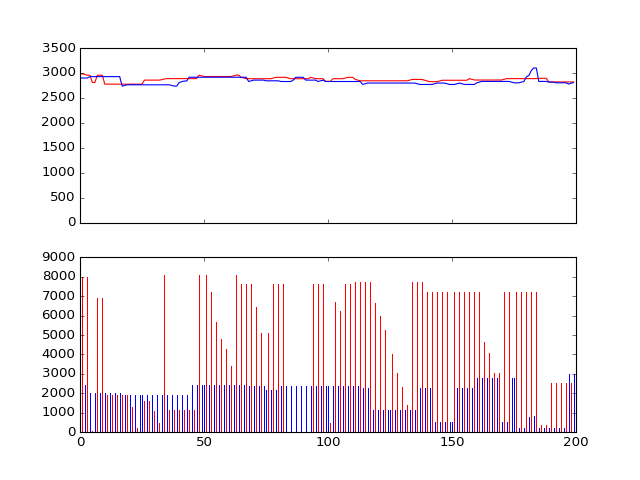

In [18]:
fig, ax = plt.subplots(2, sharex=True)

In [19]:
a1, = ax[0].plot(asks, color="red")
a2, = ax[0].plot(bids, color="blue")

In [20]:
def update(i):
    a1.set_ydata(asks)
    a2.set_ydata(bids)
    ax[1].clear()
    b1 = ax[1].bar([i for i in range(200)], askSize, color="red", width=0.2, linewidth=0)
    b2 = ax[1].bar([i+0.2 for i in range(200)], bidSize, color="blue", width=0.2, linewidth=0)

    return a1, a2

In [21]:
ani = animation.FuncAnimation(fig, update, interval=50, blit=True)

In [22]:
draw()